# Consigna Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**



---

<br />

# Estructura general
<br />

---


## Parte A: Consideraciones Generales y Exploración de datos  
* Comenzaremos con un apartado para comentar sobre algunas definiciones y herramientas que se utilizan a lo largo de todo el Proyecto. 
* Se pretende analizar y comprender con más detalle los datos en relación a la serie de tiempo a analizar. 
* Responderemos algunas preguntas generales con los datos que tenemos, y haremos una análisis de comportamientos según años, meses, días, horas y formas de pago.  

**Objetivo:** entender mejor la información disponible y el comportamiento de la serie.

## Parte B: Componentes de la Serie  
* Se propondrán diferentes resampleos, y se analizará la serie para entender los valores atípicos. 
* Se calcularán los componentes de la serie y su interpretación. 
* Analizaremos la Estacionariedad de la serie y entenderemos sus Autocorrelaciones. 

**Objetivo:** conocer mejor la serie y sus relaciones entre valores, para elegir un resampleo util que nos ayude a modelar. 

## Parte C: Predicción a Futuro 
* Se plantea un modelo Benchmark, y obtendremos sus métricas de desempeño.. 
* Se propondrá un modelo más robusto para realizar la predicción, y se comparará los valores de las métricas obtenidas contra el modelo Benchmark.
* Se realiza una optimización de hiperparametros. 
* Se elige y justifica un modelo elegido. 

**Objetivo:** encontrar y elegir el modelo con mejor desempeño. 

## Parte D: Conclusiones, investigaciones y opcionales 
* Se extraen conclusiones del trabajo realizado y se plantean algunas alternativas de implementación.


---

<br />

## Parte A: Consideraciones Generales y Exploración de datos 
<br />

---


Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.arima.model import ARIMA


<br />

---


### Consideraciones Generales  

En este proyecto se va a utilizar el dataset ya procesado, propuesto en la consigna. Si bien no se incluirán las celdas correspondientes al análisis (el mismo notebook de Acamica del Proyecto 3 las tiene), podemos decir que se trata de: 
* un dataset que incluye información del flujo vehicular por estaciones de peaje de la Ciudad de Bs As, para los años 2017, 2018 y 2019. 
*solo se tendrá en cuenta datos de la estación Ilia, y formas de pago en Efectivo. 
* Se realiza ajuste en el formato de la variable fecha y se ordena la información según esta variable.  

Para el modelado:  
* vamos a utilizar una función que nos ayude a entender el rendimiento del modelo (función utilizada en proyectos anteriores).  
* usaremos un enfoque de Machine Learning pensando en un modelado de una Regresión.  

Comencemos con el análisis.


Cargamos el dataset previamente guardado, y ajustamos el formato de la fecha.

In [2]:
#dataset = pd.read_csv('/home/alex/Documents/DS-Online-59/Proyectos/TS_17_18_19_h.csv', sep =',')
dataset = pd.read_csv('/home/alex/Documents/DS-Online-59/Proyectos/TS_17_18_19_formas_pago.csv', sep =',')
dataset['fecha2'] = pd.to_datetime(dataset.fecha)
dataset.drop(columns=['fecha'], inplace = True)
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

print('Tamaño del dataset: ', dataset.shape)
print('\n')
print(dataset.head())

Tamaño del dataset:  (752552, 6)


       dia    sentido tipo_vehiculo forma_pago  cantidad_pasos      fecha
0  Domingo     Centro       Liviano   TELEPASE             459 2017-01-01
1  Domingo  Provincia        Pesado   TELEPASE               3 2017-01-01
2  Domingo  Provincia        Pesado   EFECTIVO               1 2017-01-01
3  Domingo  Provincia        Pesado   TELEPASE               7 2017-01-01
4  Domingo  Provincia        Pesado   EFECTIVO               6 2017-01-01


### Exploración de datos  

Vamos a generar 2 datasets diferentes que usaremos en la exploración de datos, la diferencia está en que uno contendrá información de la variable “forma_pago” y el otro no. 
Adicionalmente, reagrupamos los datos según los diferentes atributos del dataset, y generamos atributos nuevos que hagan referencia el año, mes y hora.


In [3]:
dataset_fp = dataset.groupby(['fecha','dia','sentido','tipo_vehiculo','forma_pago'])['cantidad_pasos'].sum().reset_index()

dataset_fp['year'] = dataset_fp['fecha'].dt.year
dataset_fp['month'] = dataset_fp['fecha'].dt.month
dataset_fp['hour'] = dataset_fp['fecha'].dt.hour

dataset = dataset[dataset.forma_pago == 'EFECTIVO']
dataset = dataset.drop(columns = ['forma_pago'])
dataset = dataset.groupby(['fecha','dia','sentido','tipo_vehiculo'])['cantidad_pasos'].sum().reset_index()

dataset['year'] = dataset['fecha'].dt.year
dataset['month'] = dataset['fecha'].dt.month
dataset['hour'] = dataset['fecha'].dt.hour

print('Dataset con variable "forma_pago"')
print(dataset_fp.head())
print('\n')
print('Dataset sin variable "forma_pago"')
print(dataset.head())

Dataset con variable "forma_pago"
       fecha      dia sentido tipo_vehiculo            forma_pago  \
0 2017-01-01  Domingo  Centro       Liviano              EFECTIVO   
1 2017-01-01  Domingo  Centro       Liviano                EXENTO   
2 2017-01-01  Domingo  Centro       Liviano            INFRACCION   
3 2017-01-01  Domingo  Centro       Liviano            NO COBRADO   
4 2017-01-01  Domingo  Centro       Liviano  TARJETA DISCAPACIDAD   

   cantidad_pasos  year  month  hour  
0             880  2017      1     0  
1               3  2017      1     0  
2               2  2017      1     0  
3             183  2017      1     0  
4               5  2017      1     0  


Dataset sin variable "forma_pago"
                fecha      dia    sentido tipo_vehiculo  cantidad_pasos  year  \
0 2017-01-01 00:00:00  Domingo     Centro       Liviano             880  2017   
1 2017-01-01 00:00:00  Domingo     Centro        Pesado              33  2017   
2 2017-01-01 00:00:00  Domingo  Provin

Para nuestro análisis vamos a trabajar principalmente sobre el dataset sin incluir la variable “forma_pago”. Analicemos más en profundidad nuestro dataset.

In [4]:
print('Cantidad de valores nulos: ')
print(dataset.isnull().sum())
print('\n')
print('Datos estadísticos: ')
print(dataset.describe(include=np.object))
print(dataset.describe())

Cantidad de valores nulos: 
fecha             0
dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
year              0
month             0
hour              0
dtype: int64


Datos estadísticos: 
           dia sentido tipo_vehiculo
count   104032  104032        104032
unique       7       2             2
top      Lunes  Centro       Liviano
freq     14915   52024         52109
       cantidad_pasos           year          month           hour
count   104032.000000  104032.000000  104032.000000  104032.000000
mean       460.104401    2017.998029       6.515322      11.513890
std        563.779501       0.817300       3.444365       6.918044
min          1.000000    2017.000000       1.000000       0.000000
25%         22.000000    2017.000000       4.000000       6.000000
50%         90.000000    2018.000000       7.000000      12.000000
75%        921.000000    2019.000000      10.000000      18.000000
max       2503.000000    2019.000000      12.000000    

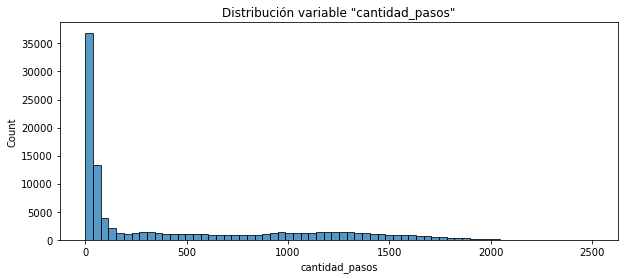

In [5]:
plt.figure(figsize=(10,4))
sns.histplot(x='cantidad_pasos', data=dataset)

plt.title('Distribución variable "cantidad_pasos"')
plt.show()

*Destacamos que el dataset no presenta valores nulos. 
La variable de interés “cantidad_pasos” presenta una alta dispersión de valores, esto también lo podemos observar en la gráfica, donde en su histograma observamos una larga cola hacia la izquierda.*


Analicemos el comportamiento de la variable “cantidad_pasos” según año, mes, día y hora.  
Vamos a utilizar gráficos de caja para este análisis, y adicionalmente marcaremos el valor de la media con la ayuda de un cuadrado rojo según corresponda.

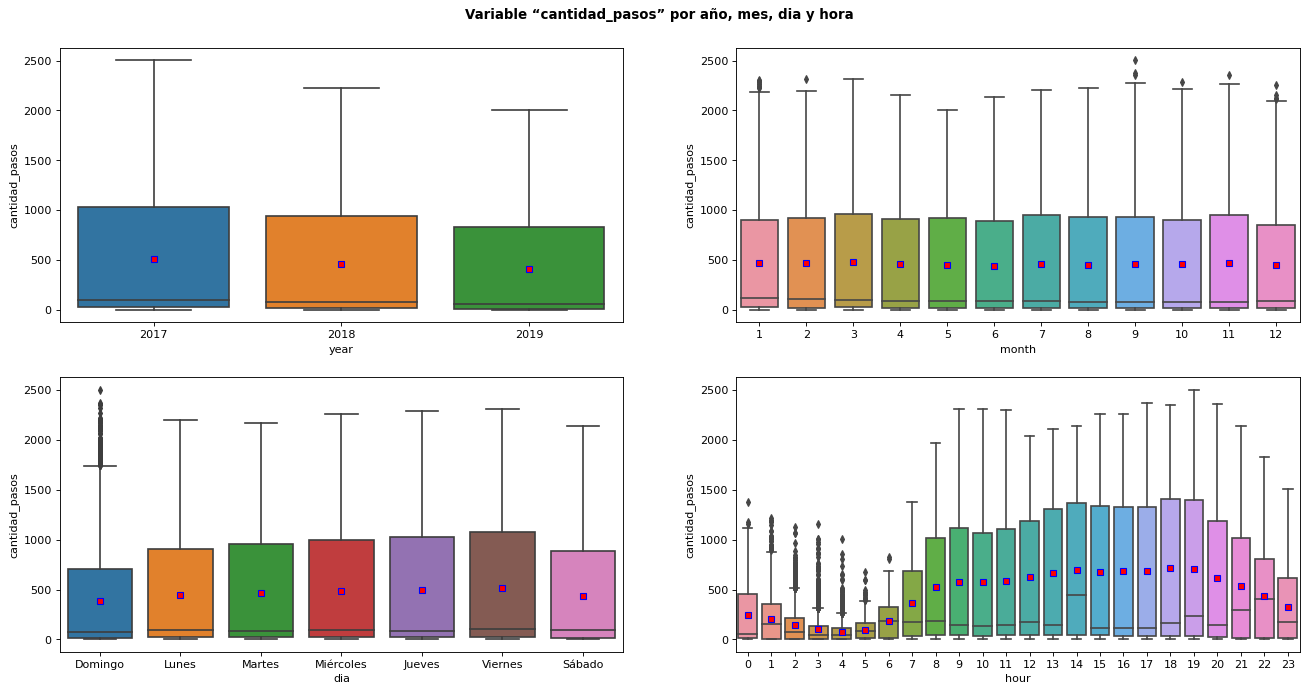

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(20,10), dpi= 80)

sns.boxplot(x='year', y='cantidad_pasos', data=dataset, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "5"}, ax=axes[0][0])
sns.boxplot(x='month', y='cantidad_pasos', data=dataset, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "5"}, ax=axes[0][1])
sns.boxplot(x='dia', y='cantidad_pasos', data=dataset, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "5"}, ax=axes[1][0])
sns.boxplot(x='hour', y='cantidad_pasos', data=dataset,showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "5"}, ax=axes[1][1])

fig.suptitle('Variable “cantidad_pasos” por año, mes, dia y hora',fontweight ="bold", y=0.93)
plt.show()

*Podemos observar que:*  
- *año a año la cantidad de pasos de vehículos que pagaron en efectivo fue disminuyendo. Para el 2017 el máximo llegó a cerca de 2500 pasos, mientras que para 2019 fue una cifra cercana a los 2000. Es para destacar que como la media de pasos cae de un año al otro , mientras que la mediana es bastante similar en los tres años.*   
- *en cuanto a los meses la cantidad de pasos se mantiene similar, se puede ver que para Mayo el valor máximo es el más bajo de todos (cerca de 2000 pasos). Destacamos también que la mediana como la media se mantienen muy parecida para todos los meses.*  
- *si vemos el análisis abierto por días, vemos que el valor máximo de pasos va en incremento desde el Domingo, y llega a un máximo el Viernes. Lo mismo ocurre con el valor promedio, arranca por debajo de 500 para el Domingo, y el Viernes está mas próximo a 500.* *Se destaca también que el tamaño de las cajas aumenta desde el Domingo al Viernes, esto quiere decir que el 50% de las muestras (tamaño de las cajas) cada vez ocupa una área mayor (más dispersión de valores).*  
- *analizando por hora, se nota claramente un comportamiento marcado de la cantidad de pasos, las horas donde se registra menor actividad es entre las 1 y las 6 de la mañana, mientras que las zonas con mayor cantidad de pasos las tenemos durante la jornada diurna, entre las 8 y 21 horas.* 


Realicemos ahora el mismo análisis, pero abriendo la información año a año.

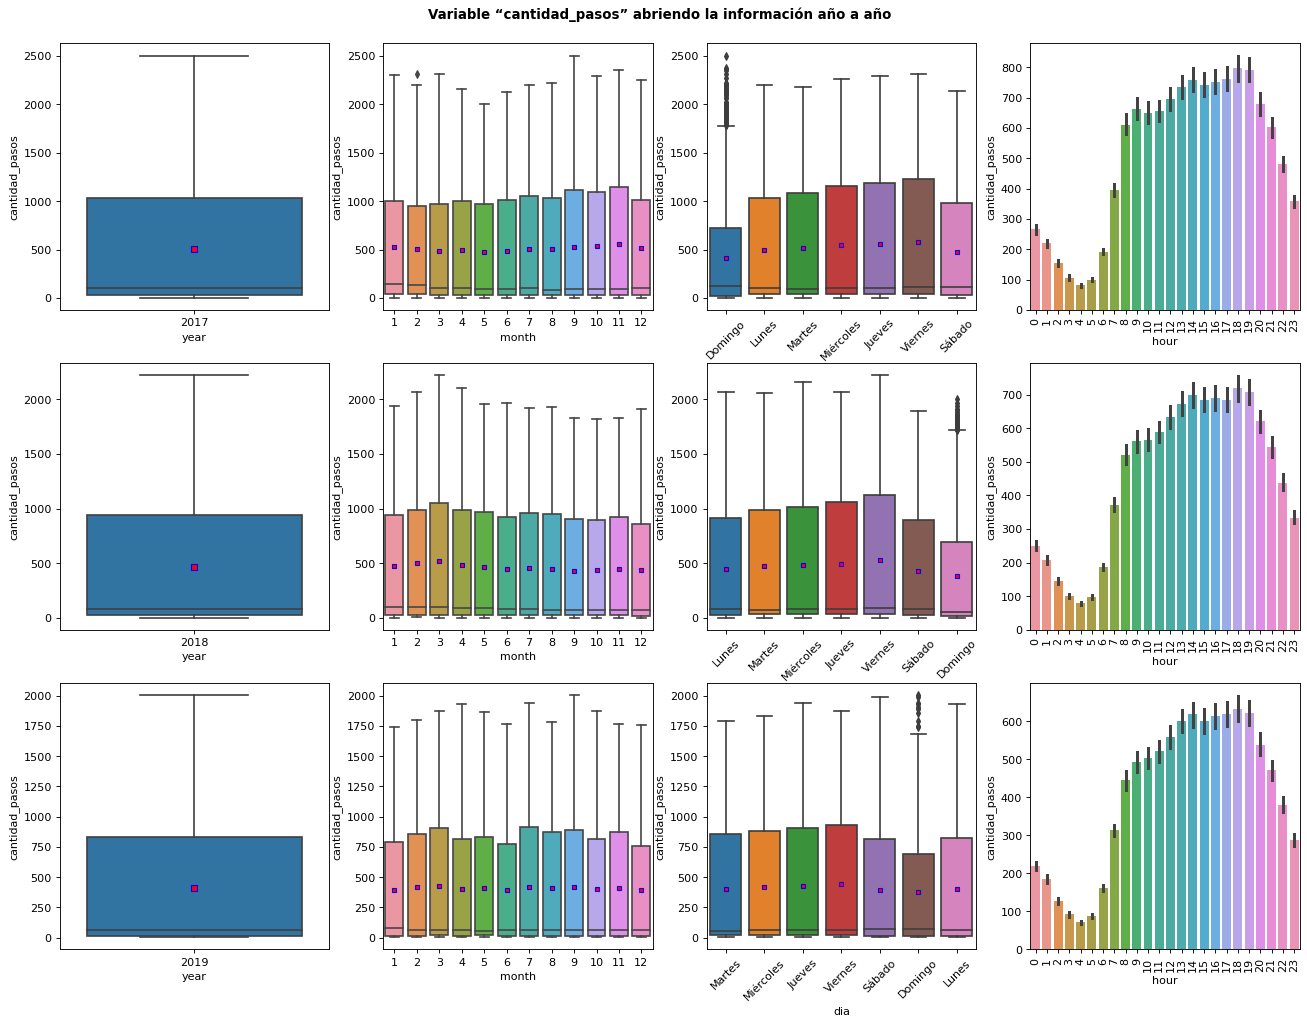

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(20,15), dpi= 80)

dataset_aux = dataset[dataset.year==2017]
sns.boxplot(x='year', y='cantidad_pasos', data=dataset_aux, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "5"}, ax=axes[0][0])
sns.boxplot(x='month', y='cantidad_pasos', data=dataset_aux, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "4"}, ax=axes[0][1])
sns.boxplot(x='dia', y='cantidad_pasos', data=dataset_aux, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "4"}, ax=axes[0][2])
sns.barplot(x='hour', y='cantidad_pasos', data=dataset_aux, ax=axes[0][3])
plt.setp(axes[0][2].get_xticklabels(), rotation=45)
plt.setp(axes[0][3].get_xticklabels(), rotation=90)

dataset_aux = dataset[dataset.year==2018]
sns.boxplot(x='year', y='cantidad_pasos', data=dataset_aux, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "5"}, ax=axes[1][0])
sns.boxplot(x='month', y='cantidad_pasos', data=dataset_aux, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "4"}, ax=axes[1][1])
sns.boxplot(x='dia', y='cantidad_pasos', data=dataset_aux, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "4"}, ax=axes[1][2])
sns.barplot(x='hour', y='cantidad_pasos', data=dataset_aux, ax=axes[1][3])
plt.setp(axes[1][2].get_xticklabels(), rotation=45)
plt.setp(axes[1][3].get_xticklabels(), rotation=90)

dataset_aux = dataset[dataset.year==2019]
sns.boxplot(x='year', y='cantidad_pasos', data=dataset_aux, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "5"}, ax=axes[2][0])
sns.boxplot(x='month', y='cantidad_pasos', data=dataset_aux, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "4"}, ax=axes[2][1])
sns.boxplot(x='dia', y='cantidad_pasos', data=dataset_aux, showmeans=True,meanprops={"marker":"s","markerfacecolor":"red", "markeredgecolor":"blue","markersize": "4"}, ax=axes[2][2])
sns.barplot(x='hour', y='cantidad_pasos', data=dataset_aux, ax=axes[2][3])
plt.setp(axes[2][2].get_xticklabels(), rotation=45)
plt.setp(axes[2][3].get_xticklabels(), rotation=90)

fig.suptitle('Variable “cantidad_pasos” abriendo la información año a año',fontweight ="bold", y=0.91)
plt.show()

*Algunas conclusiones:*  
- *destacamos que año a año la cantidad de pasos que pagaron en “Efectivo” fue disminuyendo.*  
- *a nivel de meses para Sep-2017 tenemos la mayor cantidad de pasos, mientras que para al año siguiente el máximo está en Mar-2018. y para el 2019 tenemos un comportamiento muy similar para Mar-2019, Jul-2019 y Sep-2019.*  
- *si analizamos los días, vemos para todos los años el mismo comportamiento, la actividad se incrementa desde Domingo a Viernes.*  
- *a nivel de hora, el comportamiento también se mantiene similar para todos los años, la hora con menor actividad (pasos promedio) es 4 de la mañana, mientras que la de mayor actividad es 18 horas.*


Analicemos ahora a nivel de año, mes, día y hora cuales registran el menor número de actividad, y cuales registran el mayor.  
Consideramos como “menor actividad” aquellos momentos donde tuvimos un solo paso, y como momentos de “mayor actividad” cuando tenemos más del percentil 99 de la variable *“cantidad_pasos”*.


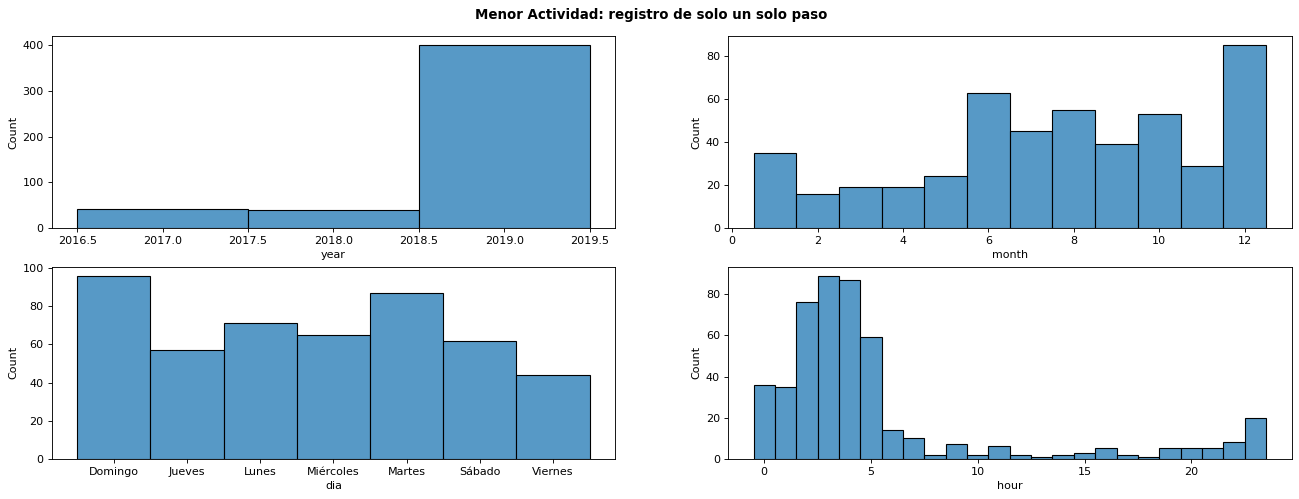

In [8]:
dataset_aux = dataset[dataset.cantidad_pasos==1]

fig, axes = plt.subplots(2, 2, figsize=(20,7), dpi= 80)
sns.histplot(x='year', data=dataset_aux, ax=axes[0][0], discrete=True)
sns.histplot(x='month', data=dataset_aux, ax=axes[0][1], discrete=True)
sns.histplot(x='dia', data=dataset_aux, ax=axes[1][0], discrete=True)
sns.histplot(x='hour', data=dataset_aux, ax=axes[1][1], discrete=True)

fig.suptitle('Menor Actividad: registro de solo un solo paso',fontweight ="bold", y=0.93)
plt.show()

*Cantidad de veces donde se registró solo un solo paso de vehículos:*  
- *en el año 2019 tenemos la mayor cantidad de veces que solo se registró un paso. Recordemos que este año es también el de menor actividad.*  
- *el mes de Diciembre es el que registra la mayor cantidad de veces con un solo paso. En los análisis anteriores no se evidenciaba esta situación.*  
- *para los días, Domingo es el día que más registro de un solo paso tiene, seguido por el Martes. Recordemos que el Domingo en general es el día de menor actividad.*  
- *para las horas, las horas con menor actividad (2, 3 y 4 de la mañana) son las que mayor cantidad de registro de un paso presentan.*  


In [9]:
p99 = np.nanpercentile(dataset.cantidad_pasos, 99)
print('Valor percentil 99 de "cantidad_pasos"= ',p99)

Valor percentil 99 de "cantidad_pasos"=  1839.0


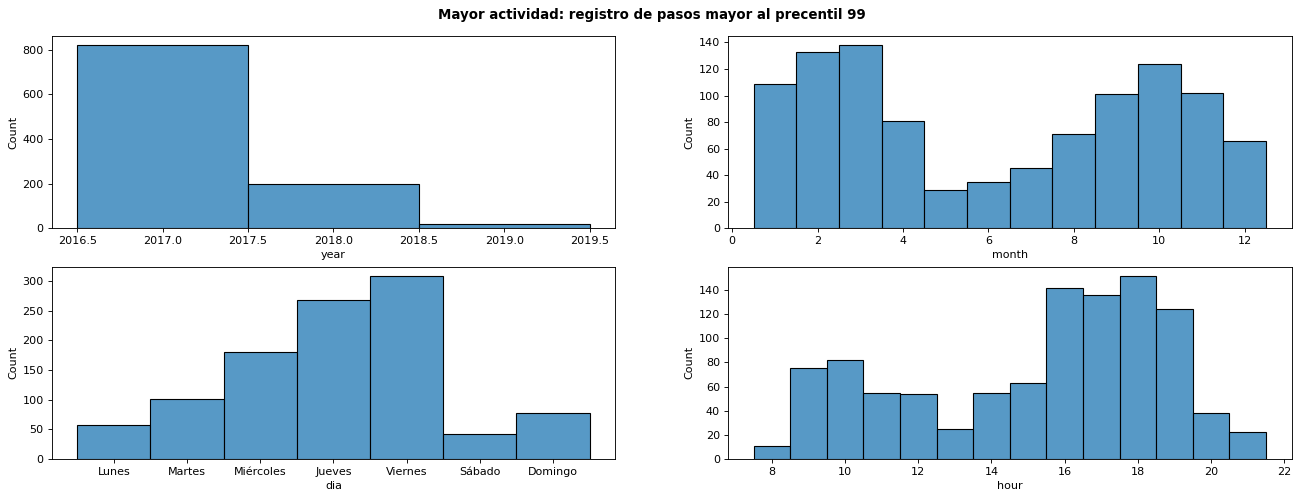

In [10]:
dataset_aux = dataset[dataset.cantidad_pasos>p99]

fig, axes = plt.subplots(2, 2, figsize=(20,7), dpi= 80)
sns.histplot(x='year', data=dataset_aux, ax=axes[0][0], discrete=True)
sns.histplot(x='month', data=dataset_aux, ax=axes[0][1], discrete=True)
sns.histplot(x='dia', data=dataset_aux, ax=axes[1][0], discrete=True)
sns.histplot(x='hour', data=dataset_aux, ax=axes[1][1], discrete=True)

fig.suptitle('Mayor actividad: registro de pasos mayor al precentil 99',fontweight ="bold", y=0.93)
plt.show()

*Cantidad de veces donde se registraron más pasos que el percentil 99 de la variable “cantidad_pasos”:*  
- *a diferencia del apartado anterior, el año con mayor cantidad de veces que registró un valor mayor al percentil 99 fue el 2017.*  
- *si lo vemos a nivel de mes, los meses con mayor actividad fueron Febrero y Marzo, y luego aparece un pico en Octubre.*  
- *a nivel de días, vemos un aumento de actividad desde Domingo a Viernes.*  
- *para las horas, donde se registró una cantidad de pasos mayor al percentil 99 es para las 18 horas, pero se destaca también un primer pico en las horas de la mañana, alrededor de las 10 horas.*


Repasemos ahora cómo evolucionaron las formas de pago para estos tres años.  
Para esto vamos a utilizar el dataset que contiene la variable *”forma_pago”*.  


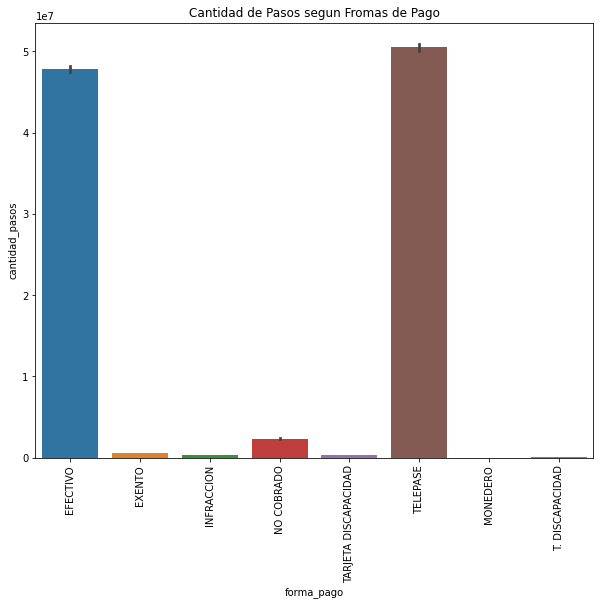

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(x='forma_pago', y='cantidad_pasos',estimator=sum ,data=dataset_fp)
plt.title('Cantidad de Pasos segun Fromas de Pago')
plt.xticks(rotation=90)

plt.show()

*Vemos que las dos formas de pagos más utilizadas son “Efectivo” y “Telepase”.*

Hagamos una análisis de estas dos formas de pago a lo largo de los años.

In [12]:
mask = np.logical_or(dataset_fp.forma_pago=='EFECTIVO', dataset_fp.forma_pago == 'TELEPASE')
dataset_fp = dataset_fp[mask]

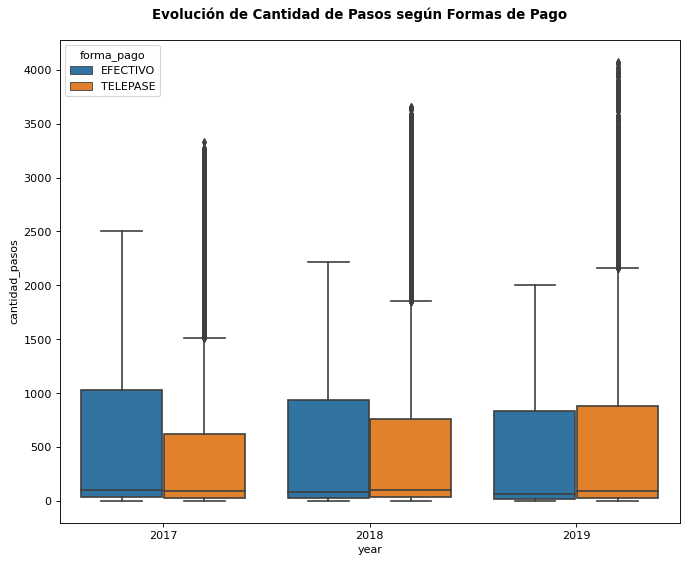

In [13]:
fig, axes = plt.subplots(figsize=(10,8), dpi= 80)

sns.boxplot(x='year', y='cantidad_pasos',hue='forma_pago', data=dataset_fp)

fig.suptitle('Evolución de Cantidad de Pasos según Formas de Pago',fontweight ="bold", y=0.93)
plt.show()

*Como podemos observar, año a año la forma de pago en Efectivo fue disminuyendo, mientras que el pago por Telepase fue aumentando.*

*Entonces, como conclusiones de nuestro dataset podemos decir:*  
- *La forma de pago en efectivo fue disminuyendo, mientras que otras formas de pago, como Telepaso, fue aumentando.*  
- *Sin embargo, el promedio de cantidad de pasos año a año se mantienen en valores similares.*  
- *Los meses con mayor actividad variaron según el año analizado, para el 2017 fue entre Septiembre y Noviembre, para el 2018 entre Febrero y Abril, y para el 2019 entre Febrero y Abril y luego repuntó nuevamente en Julio a Septiembre.*  
- *A nivel de días, Viernes es el día de mayor actividad, mientras que los Domingos son los días con menor cantidad de pasos.*  
- *A nivel de horas, las horas con menor actividad son a la madrugada (entre las 3 y las 5 de la manana), y las horas de mayor actividad están durante la jornada diurna, con un máximo por la tarde (entre las 17 y las 19).*  
- *Si analizamos la cantidad de veces donde solo se registró un paso, vemos que Diciembre es el mes donde más eventos de este tipo se registraron.*  
- *Mientras que si analizamos las veces donde se superó el percentil 99 de la variable “cantidad_pasos” los meses de Febrero, Marzo y Octubre son los de mayor actividad, mientras que a nivel de horas podemos decir que fue por la tarde (de 16 a 19) y por la mañana (9 y 10) en menor medida.* 


---

<br />

## Parte B: Componentes de la Serie 
<br />

---


Tomamos el dataset sin la variable *”forma_pago”*, y comencemos a realizar algunos resampleos y su representación gráfica.

In [14]:
year = dataset.resample('Y', on = 'fecha').sum()
year = year.drop(columns=['year', 'month', 'hour'])

mes = dataset.resample('M', on = 'fecha').sum()
mes = mes.drop(columns=['year', 'month', 'hour'])

semana = dataset.resample('W', on = 'fecha').sum()
semana = semana.drop(columns=['year', 'month', 'hour'])

dia = dataset.resample('D', on = 'fecha').sum()
dia = dia.drop(columns=['year', 'month', 'hour'])

hora = dataset.resample('H', on = 'fecha').sum()
hora = hora.drop(columns=['year', 'month', 'hour'])

In [15]:
print('Tamaño de los dataset resampleados: ')
print('- Año: ', year.shape)
print('- Mes: ', mes.shape)
print('- Semana: ', semana.shape)
print('- Dia: ', dia.shape)
print('- Hora: ', hora.shape)


Tamaño de los dataset resampleados: 
- Año:  (3, 1)
- Mes:  (36, 1)
- Semana:  (158, 1)
- Dia:  (1095, 1)
- Hora:  (26280, 1)


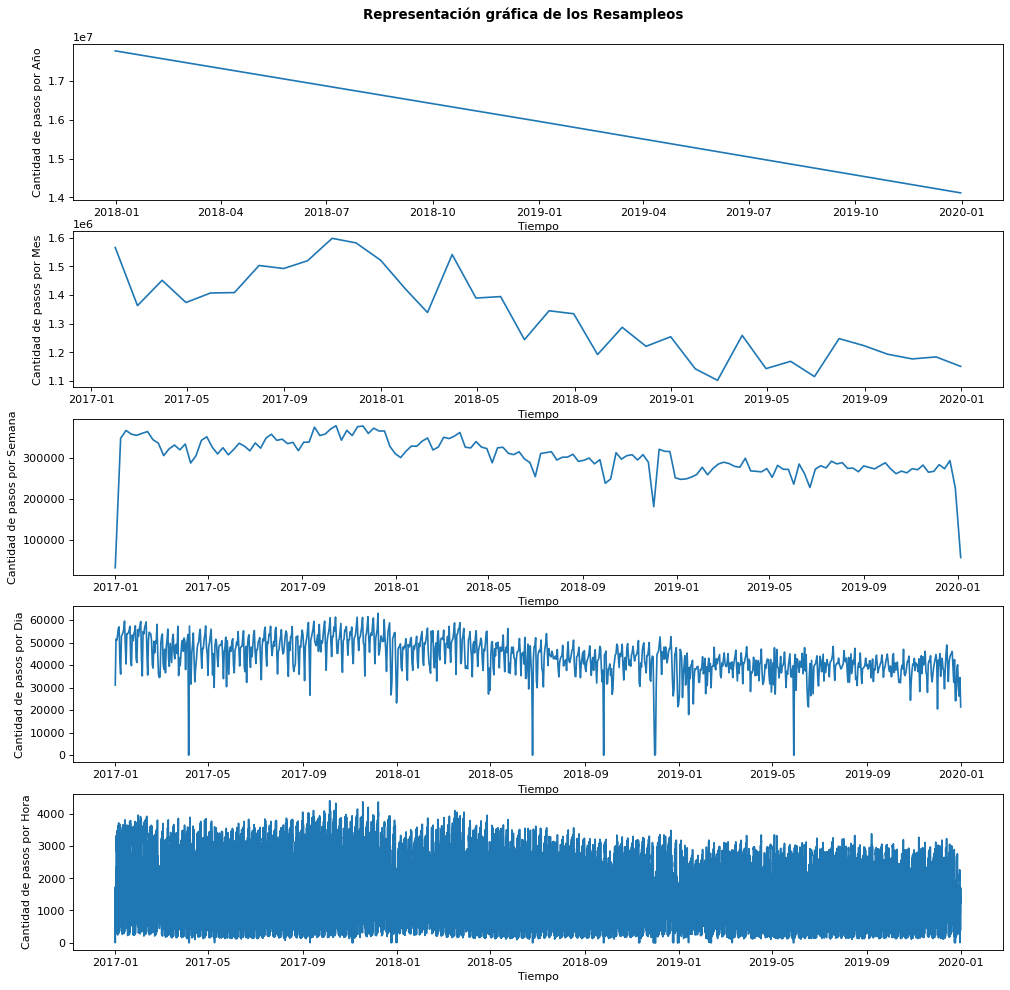

In [16]:
fig, axes = plt.subplots(5, 1, figsize=(15,15), dpi= 80)

axes[0].plot(year.index, year.cantidad_pasos)
axes[0].set_xlabel('Tiempo')
axes[0].set_ylabel('Cantidad de pasos por Año')

axes[1].plot(mes.index, mes.cantidad_pasos)
axes[1].set_xlabel('Tiempo')
axes[1].set_ylabel('Cantidad de pasos por Mes')

axes[2].plot(semana.index, semana.cantidad_pasos)
axes[2].set_xlabel('Tiempo')
axes[2].set_ylabel('Cantidad de pasos por Semana')

axes[3].plot(dia.index, dia.cantidad_pasos)
axes[3].set_xlabel('Tiempo')
axes[3].set_ylabel('Cantidad de pasos por Dia')

axes[4].plot(hora.index, hora.cantidad_pasos)
axes[4].set_xlabel('Tiempo')
axes[4].set_ylabel('Cantidad de pasos por Hora')

fig.suptitle('Representación gráfica de los Resampleos',fontweight ="bold", y=0.91)
plt.show()



*Podemos observar que a nivel de tamaño del dataset, los resampleos de año, mes, y semana, no presentan un gran cantidad de registros, esto puede ser perjudicial a la hora de entrenar y evaluar nuestro modelo. Si vemos los resampleos a nivel de día y hora, si presentan una buena cantidad de registros que nos podría ser de utilidad.*  
*Si analizamos gráficamente, vemos que a nivel de año y mes, no tenemos una buena granularidad de los datos. A partir de las semanas ya empezamos a encontrarnos con otro nivel de detalle.*  
*Si nos detenemos a analizar a nivel de día, podemos destacar que tenemos 5 puntos donde la cantidad de pasos es de casi 0 autos. Además, se pueden distinguir los escalones según los años, en el 2017 la gráfica tiene valores más altos que en el 2019.*  
*Para el gráfico de horas, no se alcanza a diferenciar demasiada información, parece algo ruidoso. Sin embargo, los niveles máximos de pasos vemos que son más altos durante 2017, que en 2019.*


Analicemos que sucede con esos días donde parece que no tuvimos casi ningún paso registrado.

In [17]:
print(dia.sort_values(by=['cantidad_pasos']).head(10))

            cantidad_pasos
fecha                     
2018-06-25               0
2018-09-25               0
2018-11-30               0
2019-05-29               0
2017-04-06              40
2018-12-01             350
2019-01-13           18076
2018-11-29           19728
2019-12-01           20553
2019-12-31           21447


El buscar en las noticias en esas fechas tenemos:  
- 2017-04-06: cantidad de pasos: 40 | Motivo: paro nacional | (http://tapas.clarin.com/tapa.html#20170406)  
- 2018-06-25: cantidad de pasos: 0 | Motivo: paro nacional | (http://tapas.clarin.com/tapa.html#20180625)  
- 2018-09-25: cantidad de pasos: 0 | Motivo: paro nacional | (https://www.perfil.com/noticias/politica/asi-se-vive-el-cuarto-paro-nacional-contra-el-gobierno-de-mauricio-macri.phtml)  
- 2018-11-30: cantidad de pasos: 0 | Motivo:  encuentro cumbre G20 | (http://tapas.clarin.com/tapa.html#20181130)
- 2018-12-01: cantidad de pasos: 350 | Motivo:  encuentro cumbre G20 | (http://tapas.clarin.com/tapa.html#20181130)
- 2019-05-29: cantidad de pasos: 0 | Motivo: paro nacional |  (https://elintransigente.com/2019/05/comenzo-el-sexto-paro-general-contra-el-gobierno-de-mauricio-macri/)


Antes de avanzar, como ya conocemos el motivo de esos valores atípicos vamos a ajustarlos para evitar que queden en valores tan bajos.  

In [18]:
num_interpolate = dia.index[dia.cantidad_pasos < 351]

for i in num_interpolate:
    dia.cantidad_pasos.loc[i] = np.nan
    
dia = dia.interpolate()

for i in num_interpolate:
    dia.cantidad_pasos.loc[i] = int(dia.cantidad_pasos.loc[i])
    print(dia.cantidad_pasos.loc[i])

55537.0
38312.0
41299.0
23177.0
26626.0
40353.0


Sigamos analizando la serie “resampleada” según días, y veamos sus diferentes partes según un enfoque Aditivo o Multiplicativo.

In [19]:
# Descomposición Multiplicativoa
result_mul = seasonal_decompose(dia.cantidad_pasos, model='multiplicative', extrapolate_trend='freq')

# Descomposición Aditiva
result_add = seasonal_decompose(dia.cantidad_pasos, model='additive', extrapolate_trend='freq')

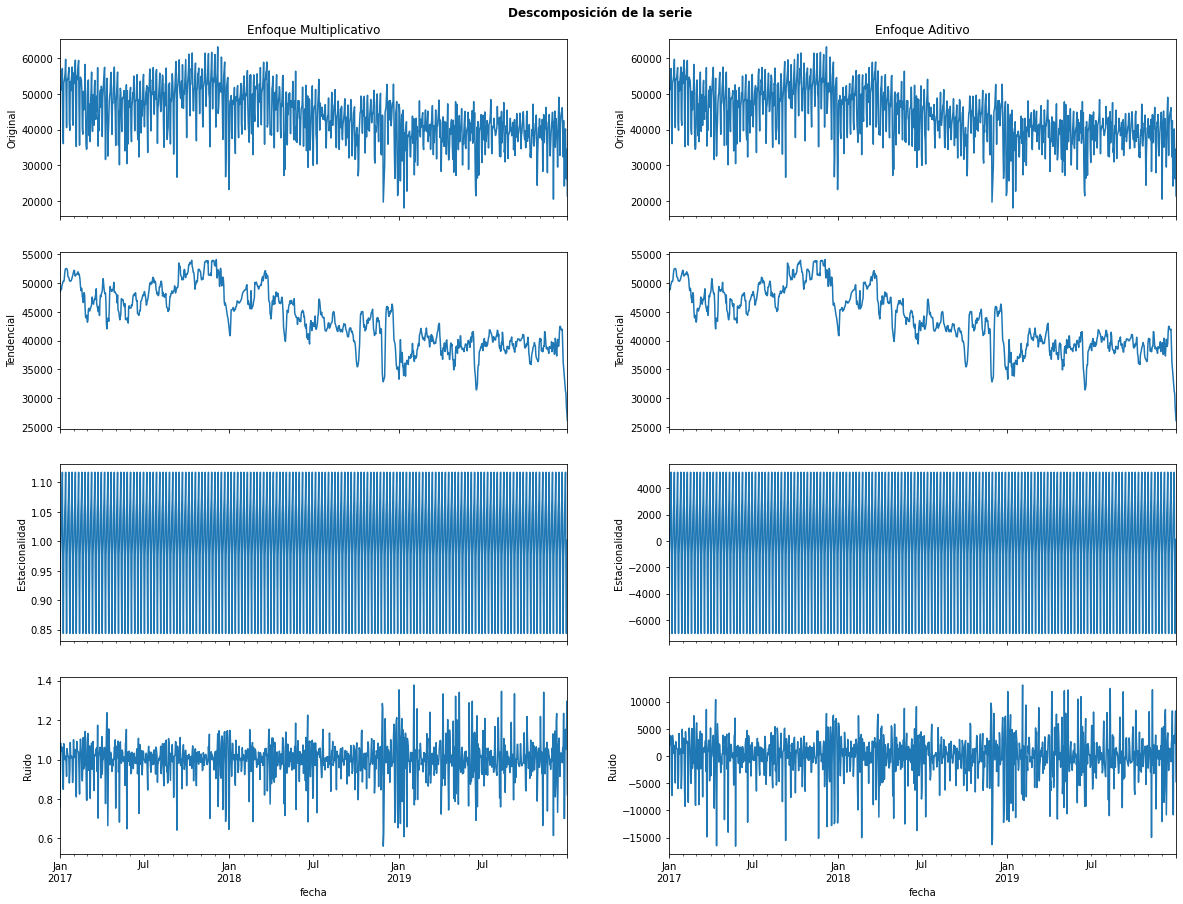

In [20]:
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(20,15))

axes[0][0].set_title('Enfoque Multiplicativo')
result_mul.observed.plot(ax=axes[0][0])
axes[0][0].set_ylabel('Original')
result_mul.trend.plot(ax=axes[1][0])
axes[1][0].set_ylabel('Tendencial')
result_mul.seasonal.plot(ax=axes[2][0])
axes[2][0].set_ylabel('Estacionalidad')
result_mul.resid.plot(ax=axes[3][0])
axes[3][0].set_ylabel('Ruido')

axes[0][1].set_title('Enfoque Aditivo')
result_add.observed.plot(ax=axes[0][1])
axes[0][1].set_ylabel('Original')
result_add.trend.plot(ax=axes[1][1])
axes[1][1].set_ylabel('Tendencial')
result_add.seasonal.plot(ax=axes[2][1])
axes[2][1].set_ylabel('Estacionalidad')
result_add.resid.plot(ax=axes[3][1])
axes[3][1].set_ylabel('Ruido')

fig.suptitle('Descomposición de la serie',fontweight ="bold", y=0.91)
plt.show()

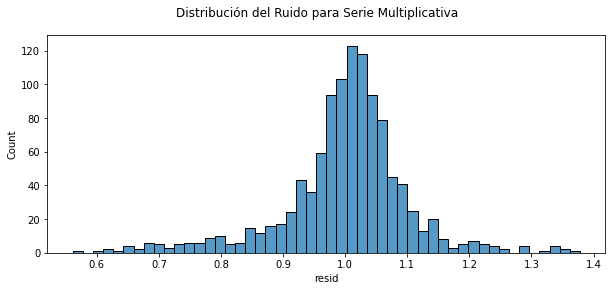

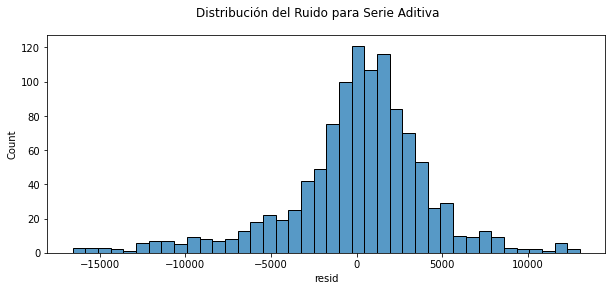

In [21]:
plt.figure(figsize=(10,4))
sns.histplot(x=result_mul.resid)
plt.suptitle('Distribución del Ruido para Serie Multiplicativa')
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(x=result_add.resid)
plt.suptitle('Distribución del Ruido para Serie Aditiva')
plt.show()

*Podemos observar que para ambos enfoques los gráficos son similares.*  
*En nuestra serie tendremos una Tendencia negativa, y con ambos enfoques se llega a un gráfico similar, y también tenemos una Estacionalidad en la serie. Estas dos componentes nos muestran información que ya conocíamos de análisis anteriores.*  
*Además, para ambos enfoques la gráfica del Ruido parece ser aleatoria, y cuando vemos su distribución, para ambos casos es una distribución normal, que es lo que se esperaba.*  
*Es para destacar que los valores que se obtienen en la componente Estacional y en el Ruido son diferentes para ambos enfoques, en el análisis Multiplicativo son valores muchos más bajos que en el análisis Aditivo.*


Realicemos ahora una prueba de Estacionariedad (Stationarity). Este es un concepto muy importante, donde una serie estacionaria es aquella que sus propiedades de media, mediana y covarianza, no cambian a lo largo del tiempo.  
Lo que buscamos es tener una serie que cumpla con esta condición de Estacionariedad, ya que resulta muy ventajoso para poder modelarlas. 


Para realizar esta prueba vamos a hacer uso del test ADF (Augmented Dickey Fuller). Si bien ADF es un proceso para determinar la presencia de raíces unitarias en la serie, a continuación intentaremos dar una idea conceptual de ambas pruebas.  
El método ADF parte de una hipótesis que establece que la serie no cumple con las condiciones de Estacionariedad, entonces buscamos realizar esta prueba sobre una serie que rechace esa hipótesis (que es lo mismo que decir que la serie cumple con la condiciones de Estacionariedad). Para estas pruebas vamos a encontrarnos con el valor en sí de la prueba, un umbral “p-value”, y tres valores críticos (el del 10% será menos estricto que el de 1%).  
Mientras “p-value” sea más chico que un valor lo suficientemente pequeño, podemos considerar más pequeño que 0.05, entonces estamos en condiciones de rechazar la hipótesis incial, y por lo tanto la serie cumplira con la condición de Estacionariedad. Mientras más pequeño sea este valor “más seguros” estaremos en rechazar la hipótesis inicial. A su vez, vamos a notar que mientras esto se cumple, el valor de la prueba en sí se hace más pequeño también en comparación a los valores umbrales obtenidos.  
Cuando esto no se cumple, es decir, “p-value” es mayor que 0.05, y el valor de la prueba es mayor que los valores umbrales, entonces no vamos a estar rechazando la hipótesis inicial, por lo tanto la serie no cumple con las condiciones de Estacionariedad.  



Realicemos la prueba sobre la serie resampleada a nivel de dias:

In [22]:
# ADF Test
result = adfuller(dia.cantidad_pasos, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.7523272135986334
p-value: 0.40437332536387854
Critial Values:
   1%, -3.4364533503600962
Critial Values:
   5%, -2.864234857527328
Critial Values:
   10%, -2.568204837482531


*Como podemos observar, nuestra serie resampleada por día no cumple con la condición de Estacionariedad, ya que el valor de “p-value” no es lo suficientemente pequeño y la prueba ADF no es tan menor como necesitamos.*

En esta condición debemos transformar nuestra serie para que cumpla con la condición de Estacionariedad, algunas alternativas son:  
- utilizar un resampleo diferente.  
- realizar una diferenciación en la serie.  

Veamos que sucede si aplicamos la misma prueba a nuestro dataset resampleado por hora:


In [23]:
# ADF Test
result = adfuller(hora.cantidad_pasos, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -15.545826391930193
p-value: 2.130572463505922e-28
Critial Values:
   1%, -3.43059933054021
Critial Values:
   5%, -2.861650196777599
Critial Values:
   10%, -2.566828654483077


*Estamos en condiciones de decir que nuestra serie resampleada a nivel de horas cumple con las condiciones de Estacionariedad.*  
*Por lo tanto continuaremos nuestro análisis utilizando la serie resampleada a nivel de hora.*

Analicemos ahora que sucede con la Autocorrelación y la Autocorrelación Parcial

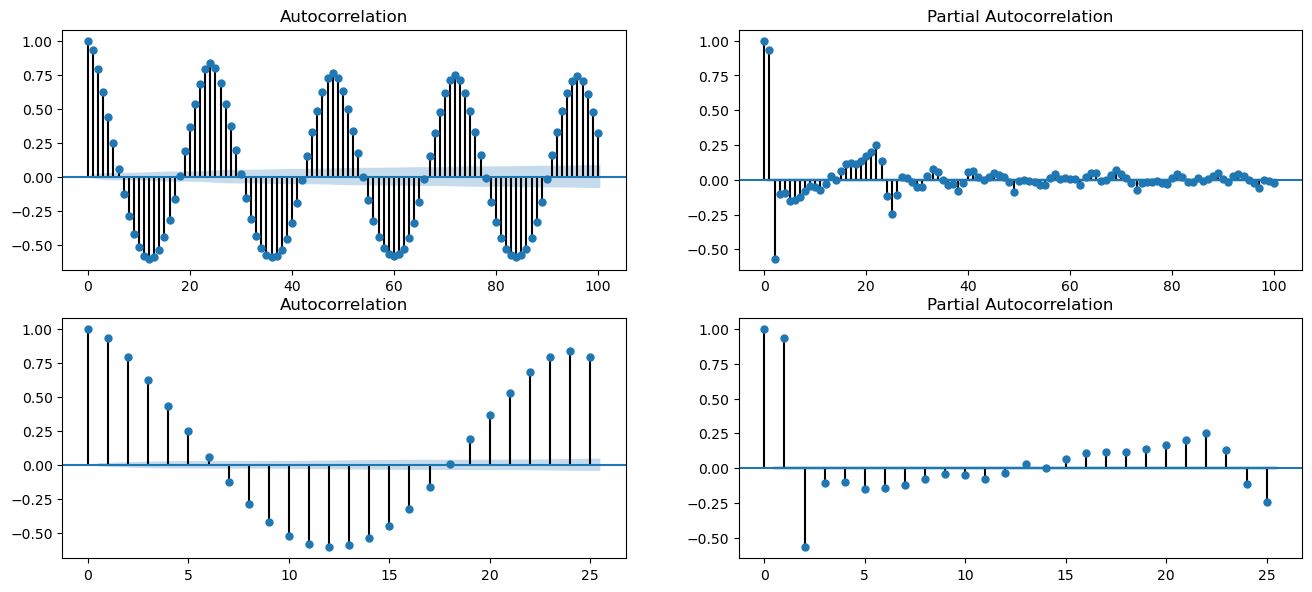

In [24]:
fig, axes = plt.subplots(2,2,figsize=(16,7), dpi= 100)
plot_acf(hora.cantidad_pasos, lags=100, ax=axes[0][0])
plot_pacf(hora.cantidad_pasos, lags=100, ax=axes[0][1])
plot_acf(hora.cantidad_pasos, lags=25, ax=axes[1][0])
plot_pacf(hora.cantidad_pasos, lags=25, ax=axes[1][1])

plt.show()

*Podemos extraer algunas conclusiones:*  
- *A nivel de Autocorrelación, podemos decir que los valores de la serie están fuertemente correlacionados y describen una forma cosenoidal. Esto lo podemos interpretar como el valor actual de la serie, esto es el valor de la cantidad de pasos en una hora dada, es casi igual al valor de pasos de la hora anterior, y es muy parecido al de la hora anterior a esa, y así sucesivamente hasta volverse casi el opuesto al de 12 horas antes, para después volver a parecerse cada vez más, hasta volver a tener un valor parecido al de 24 horas antes. Con esto podemos ver como el comportamiento de pasos cada 24 horas es muy similar entre sí, mientras que cada 12 horas es completamente opuesto.*  
- *Para el caso de la Autocorrelación Parcial recordemos que para esta autocorrelación sólo estamos comparando el efecto del valor actual de la serie contra el del retraso a analizar, independientemente de los valores intermedios.En nuestra serie vemos que la cantidad de paso en una hora dada es muy similar al de la hora anterior, pero es el opuesto al del valor de 2 horas antes, volviendo a tener un "pico" positivo a la hora 22.*

---

<br />

## Parte C: Predicción a Futuro 
<br />

---


Primeramente vamos a organizar nuestras matrices de una forma más conveniente. Como ya mencionamos antes, vamos a utilizar para predecir un enfoque de Machine Learning, como si se tratara de un problema de Regresión.  
Entonces, comencemos organizando las matrices, vamos a tomar el valor de 48 horas (2 días) para predecir la hora siguiente.



In [25]:
senial = hora.cantidad_pasos
senial.shape

(26280,)

In [26]:
look_back = 48

In [27]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print('Tamaño de matriz X: ', X.shape)
print('Tamaño de vector Y: ', y.shape)

Tamaño de matriz X:  (26231, 48)
Tamaño de vector Y:  (26231,)


In [28]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [29]:
print(X)

[[1.576e+03 1.000e+00 1.374e+03 ... 1.978e+03 1.604e+03 1.283e+03]
 [1.000e+00 1.374e+03 1.734e+03 ... 1.604e+03 1.283e+03 8.270e+02]
 [1.374e+03 1.734e+03 1.247e+03 ... 1.283e+03 8.270e+02 7.430e+02]
 ...
 [1.792e+03 1.547e+03 1.208e+03 ... 1.257e+03 1.235e+03 1.217e+03]
 [1.547e+03 1.208e+03 9.280e+02 ... 1.235e+03 1.217e+03 1.374e+03]
 [1.208e+03 9.280e+02 6.800e+02 ... 1.217e+03 1.374e+03 1.706e+03]]


In [30]:
print(y)

[ 827.  743.  457. ... 1374. 1706. 1139.]


Recordemos que necesitamos predecir el último trimestre del 2019, entonces dejaremos esa ventana de tiempo para el dataset de Test, y utilizaremos el resto de los datos como dataset de Train.  
Definimos y generemos los dataset de Train y Test.


In [31]:
N_test = 2160 # Ultimo trimestre 2019
N_train = senial.shape[0] - N_test - look_back -1 # cantidad de instancias que vamos a usar para entrenar. 
N_total = N_train + N_test

length_total = N_train + N_test + look_back


In [32]:
X_train = X[:N_train,:]
y_train = y[:N_train]
print('Dataset de Train: ', X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print('Dataset de Test: ', X_test.shape, y_test.shape)

Dataset de Train:  (24071, 48) (24071,)
Dataset de Test:  (2160, 48) (2160,)


Proponemos como modelo Benchmark uno muy simple, retrasaremos la serie un paso (una hora), con esto estaremos prediciendo el valor actual copiando el valor de la hora anterior.

In [33]:
# Benchamrk
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

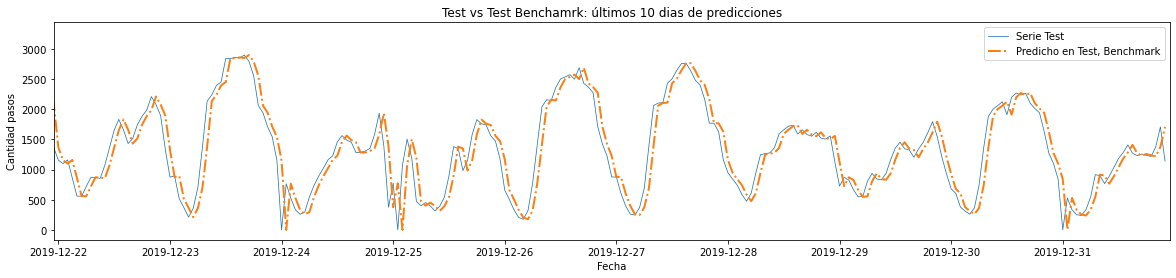

In [34]:
plt.figure(figsize=(20,4))
plt.plot(senial.index[N_train+look_back: length_total], y_test,lw = 0.75, label = 'Serie Test')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back+1920], senial.index[length_total])
plt.xlabel('Fecha')
plt.ylabel('Cantidad pasos')
plt.title('Test vs Test Benchamrk: últimos 10 dias de predicciones')
plt.legend()
plt.show()

Como evaluación las siguientes métricas:
- Raíz del Error Medio Cuadrado (RMSE): se trata de un valor que nos da una idea de la magnitud del error, y en particular, por su definición matemática, su valor estará más afectado por los errores (valor_real - valor_predicho) grandes.  
- R Cuadrado (R2): nos entregará una proporción (estrictamente hablando calcula el Coeficiente de Determinación) el cual nos ofrece una valor que nos ayuda a entender cuán bien el modelo se ajusta. 


In [35]:
RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred_benchmark))
print('RMSE Error:', RMSE)

R2 = r2_score(y_test, y_test_pred_benchmark)
print('R2 Error:',R2)

print('\n') 

RMSE Error: 316.77012637394165
R2 Error: 0.866298408092842




Antes de avanzar, vamos a definir y utilizar una función que nos ayude a evaluar los modelos que probemos, permitiendo comparar el error RMSE y R2 tanto en el set de Train, como en Test, y además nos va a mostrar un histograma de errores en “Y - Y_PRED”, junto con un gráfico de dispersión de valores “Y vs Y_PRED”. 

In [36]:
def evaluacion_modelo(X_train, X_test, y_train, y_test, modelo):
    
    print('Modelo a evaluar: ' + str(modelo))
    print('\n')
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Error RMSE en Train: {rmse_train}')
    print(f'Error RMSE en Test: {rmse_test}')
    print('\n')
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'Error R2 en Train: {r2_train}')
    print(f'Error R2 en Test: {r2_test}')
    print('\n')
    
    #log_train = np.sqrt(mean_squared_log_error( y_train, y_train_pred ))
    #log_test = np.sqrt(mean_squared_log_error( y_test, y_test_pred ))
    #print(f'log Train: {log_train}')
    #print(f'log Test: {log_test}')
    #print('\n')
    
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 50, label = 'Train')
    sns.distplot(y_test - y_test_pred, bins = 50, label = 'Test')
    
    plt.xlabel("Errores", fontsize = 12)
    plt.xticks(rotation = 45)
    plt.legend()
    plt.title('Histograma de errores "Y - Y_PRED"', fontweight = "black", y=1.05)
    
    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s=1) 
    plt.xticks(rotation = 45, horizontalalignment="right")
    plt.xlabel("Valores originales del Pasos", fontsize = 12)
    plt.ylabel("Valores predichos del Pasos", fontsize = 12)
    plt.title('Gráfico de dispersión de valores "Y vs Y_PRED"', fontweight = "black", y=1.05)
    
    plt.subplots_adjust(wspace=0.4)
    
    plt.show()

Generemos y entrenemos un RandomForest para analizar si desempeño.


In [37]:
# Generamos el modelo
rf = RandomForestRegressor(random_state=42)

In [38]:
# Entrenamos el modelo
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

Antes de realizar la predicción, analicemos qué datos están considerando como más importantes para realizar el entrenamiento. 

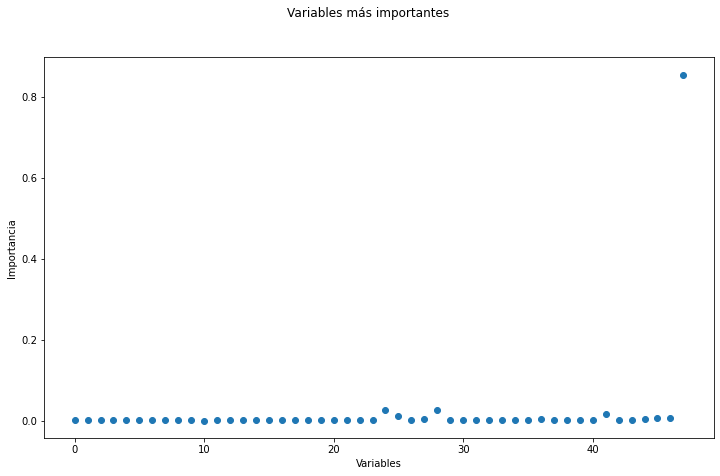

In [39]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.suptitle('Variables más importantes')
plt.show()

*Podemos observar que la variable más importante en el modelo es la número 48, y vemos un pico muy bajo en la hora 25, 29 y 42.*  
*Recordemos que estamos intentando pedir la hora siguiente (la 49) con las 48 horas anteriores. Recordemos también que, cuando analizamos las autocorrelaciones vimos que el valor de la hora analizada era muy similar al de la hora anterior, y volvía a tener un valor muy similar al del día anterior en esa misma hora.*  
*Esto que estuvimos analizando en momentos anteriores queda también reflejado al momento de analizar las variables más importantes para el modelo.*


Hagamos las predicciones sobre el dataset de Train y Test, y grafiquemos los resultados obtenidos.

In [40]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

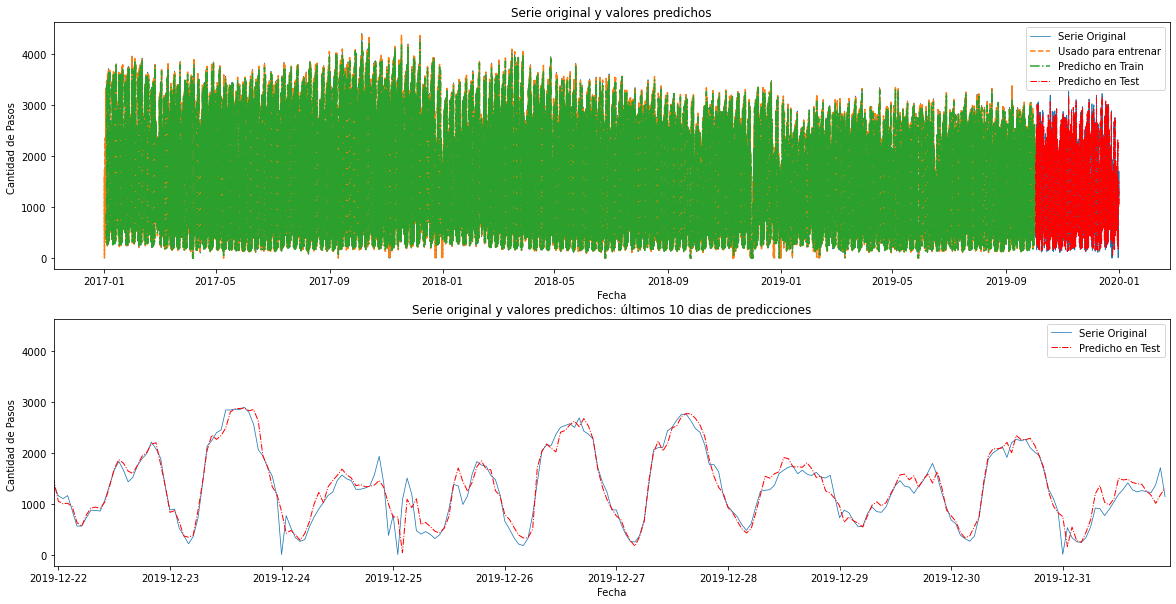

In [41]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',c='red', lw = 1, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos ')
plt.title('Serie original y valores predichos')

plt.subplot(2,1,2)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
#plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
#plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',c='red', lw = 1, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos ')
plt.title('Serie original y valores predichos: últimos 10 dias de predicciones')
plt.xlim(senial.index[N_train+look_back+1920], senial.index[length_total])

#plt.xlim(datetime.date('2019-09-01'), datetime.date('2020-01-01'))
#plt.xlim(6600,6935)

plt.show()


*Podemos observar que los valores predichos sobre el dataset de Test se ajustan bastante bien a los valores originales. Se distinguen algunos picos (por ejemplo horas cercanas al 2019-12-25), donde el modelo no alcanza a ajustarse bien del todo. Cabe destacar que esta fecha corresponde a días feriados, y el movimiento de vehículos es algo atípico.*

Realicemos la evaluación del modelo.

Modelo a evaluar: RandomForestRegressor(random_state=42)


Error RMSE en Train: 66.31917713594261
Error RMSE en Test: 154.5285228417934


Error R2 en Train: 0.9959611712881956
Error R2 en Test: 0.9681825442526124




/home/alex/miniconda3/envs/tseries/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/tseries/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


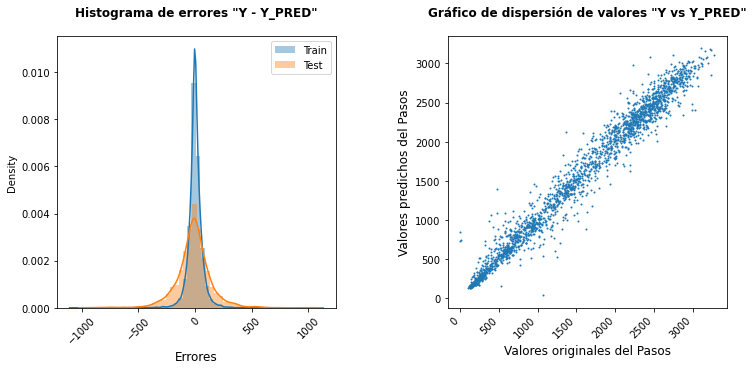

In [42]:
evaluacion_modelo(X_train, X_test, y_train, y_test, rf)

*Algunas conclusiones:*  
- *el valor de RMSE cae considerablemente de 316 para el modelo Benchmark, a 154.*  
- *el valor obtenido en R2 nos muestra que el modelo está haciendo un muy buen trabajo. Algo de esto evidenciamos al momento de analizar gráficamente la predicción.*  
- *en el histograma “Y - Y_PRED” tenemos la gráfica centrada en 0, como es de esperar, y se distingue algo de dispersión, en particular en la zona de +/- 500.*  
- *al mirar el gráfico “Y vs Y_PRED” notamos que los valores están bastante bien alineados a la diagonal, como es de esperar, y vemos que alrededor del valor 500 el modelo tiende a predecir valores mayores.*  
  
*Podemos decir que estamos haciendo un mejor modelado utilizando RandomForest en comparación con el Benchmark propuesto.*


Se propone optimizar RamdomForest con los siguientes hiperparametros: 

- n_estimators: define la cantidad de árboles a implementar en el modelo. En este tipo de modelos buscamos que cada modelo individualmente trabaje en la zona de alta varianza (ouverfiting), para luego encontrar el valor predicho mediante una votación de todos los resultados obtenidos por cada modelo indivudual. Entonces, mientras mayor cantidad de árboles implementemos, estaríamos teniendo más resultados que participen de la votación, y ayudamos a reducir la varianza general del modelo.  
Es por esto que se tomaron los valores de 100,150 y 200.

- max_feature: a la hora de aplicar cada árbol de manera individual se toma una muestra de algunos atributos, y se los utiliza para predecir. Con este hiperparametro estamos definiendo el criterio a considerar para tomar esa cantidad de atributos en cada árbol.  Para nuestro caso *auto* (considera todos los atributos del dataset), y *sqrt* (se considera una cantidad de atributos igual a la raíz cuadrada del número de atributos).  

- bootstrap: este parámetro nos define si al momento de elegir la muestra se tiene en cuenta todo el dataset, o solo las que no fueron elegidas previamente.


In [43]:
################################################################################################
#                               Optimizacion - RamdomForest                                    #
################################################################################################

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [45]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2')

In [46]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [47]:
cv_results = pd.DataFrame(grid_search_rf.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['mean_test_score', 'std_test_score', 'mean_fit_time', 'mean_score_time',
            'param_n_estimators',
            'param_max_features',
            'param_bootstrap',
            ]].head(5)

,mean_test_score,std_test_score,mean_fit_time,mean_score_time,param_n_estimators,param_max_features,param_bootstrap
2,0.963714,0.006650,171.524511,0.524375,200,auto,True
1,0.963554,0.006714,123.437858,0.388747,150,auto,True
0,0.963453,0.006617,80.971335,0.257494,100,auto,True
11,0.957664,0.009704,38.852101,0.598355,200,sqrt,False
10,0.957584,0.009758,29.262972,0.433715,150,sqrt,False


Vemos que el mejor modelo obtenido fue **n_estimarot = 200**, **max_feature = auto**, y **boostrap = True**.   
  
Realicemos la evaluación de este modelo optimizado, y comparemos con el anterior.


Modelo a evaluar: RandomForestRegressor(n_estimators=200, random_state=42)


Error RMSE en Train: 65.47779770282574
Error RMSE en Test: 154.31131947735588


Error R2 en Train: 0.9960630009990746
Error R2 en Test: 0.9682719258295661




/home/alex/miniconda3/envs/tseries/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/tseries/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


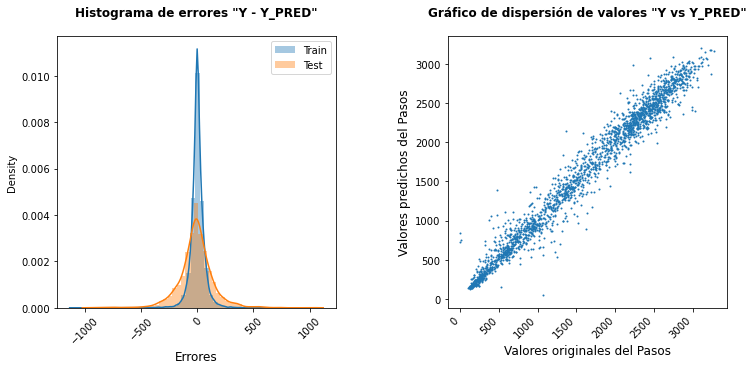

In [48]:
evaluacion_modelo(X_train, X_test, y_train, y_test, grid_search_rf.best_estimator_)

*Podemos observar:*  
- *el valor de RMSE se mantiene en 154, solo conseguimos algunos decimales de mejora.*  
- *el valor obtenido en R2 nos muestra que el modelo continua haciendo un muy buen trabajo.*  
- *en el histograma “Y - Y_PRED” tenemos la gráfica centrada en 0, como es de esperar, y se distingue algo de dispersión, en particular en la zona de +/- 500.*  
- *al mirar el gráfico “Y vs Y_PRED” notamos que los valores están bastante bien alineados a la diagonal, como es de esperar, y vemos que alrededor del valor 500 el modelo tiende a predecir valores mayores.* 


*De esta manera, podemos decir que despues de optimizar algunos hiperparametros y trabajando con un modelo **RandomForest** con los hiperparametros: **n_estimators = 200**, **max_feature = auto**, **bootstrap = True**, conseguimos una mejora muy baja.*  
  

### **Predicciones sobre 2020**

Veamos ahora cómo funciona nuestro modelo para predecir sobre el año 2020.  
Las líneas siguientes corresponden al tratamiento que se realizó sobre el archivo CSV del año 2020 original, para conseguir acomodarlo con un formato conveniente para luego procesarlo.  
Para el análisis vamos a partir de un archivo CSV guardado, luego de realizar el tratamiento que aparece a continuación.


In [ ]:
'''

# Cargamos el CSV original
dataset_2020 = pd.read_csv('/home/alex/Documents/DS-Online-59/Proyectos/flujo-vehicular-2020.csv', sep =',')
# Filtramos la información para la estación Ilia y forma de pago Efectivo
mask = np.logical_and(dataset_2020.estacion=='ILLIA', dataset_2020.forma_pago == 'Efectivo')
dataset_2020 = dataset_2020[mask]
# Descartamos las columnas que no utilizamos
dataset_2020.drop(columns = ['periodo','mes','dia_fecha','hora_inicio','forma_pago', 'estacion','observacion'], inplace = True)
#dataset_2020.head()

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_2020['fecha2'] = pd.to_datetime(dataset_2020.fecha) + pd.to_timedelta(dataset_2020.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_2020.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
dataset_2020.sort_values('fecha', inplace = True)
dataset_2020.reset_index(drop=True, inplace = True)

# Guardamos el dataset en un nuevo CSV
dataset_2020.to_csv('TS_20_h.csv', index=False)

'''

Entonces, ahora carguemos el dataset previamente guardado, y grafiquemos como se ve la cantidad de Pasos según las Fechas.

In [49]:
dataset_2020 = pd.read_csv('/home/alex/Documents/DS-Online-59/Proyectos/TS_20_h.csv', sep =',')
dataset_2020['fecha2'] = pd.to_datetime(dataset_2020.fecha)
dataset_2020.drop(columns=['fecha'], inplace = True)
dataset_2020.rename(columns = {'fecha2':'fecha'}, inplace = True)

dataset_2020 = dataset_2020.groupby(['fecha','dia','sentido','tipo_vehiculo'])['cantidad_pasos'].sum().reset_index()

print('Tamaño del dataset: ', dataset_2020.shape)
print('\n')
print(dataset_2020.head())


Tamaño del dataset:  (52374, 5)


       fecha        dia    sentido   tipo_vehiculo  cantidad_pasos
0 2020-01-01  Miércoles     Centro            Auto           467.0
1 2020-01-01  Miércoles     Centro            Moto             7.0
2 2020-01-01  Miércoles     Centro  Pesados 2 Ejes             1.0
3 2020-01-01  Miércoles  Provincia            Auto           423.0
4 2020-01-01  Miércoles  Provincia            Moto             6.0


In [50]:
print('Cantidad de valores nulos: ')
print(dataset_2020.isnull().sum())
print('\n')
print('Datos estadísticos: ')
print(dataset_2020.describe(include=np.object))
print(dataset_2020.describe())

Cantidad de valores nulos: 
fecha             0
dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
dtype: int64


Datos estadísticos: 
              dia    sentido tipo_vehiculo
count       52374      52374         52374
unique          7          2            12
top     Miércoles  Provincia          Auto
freq         7954      26748         14609
       cantidad_pasos
count    52374.000000
mean        93.221579
std        202.295918
min          1.000000
25%          2.000000
50%         11.000000
75%         66.000000
max       1458.000000


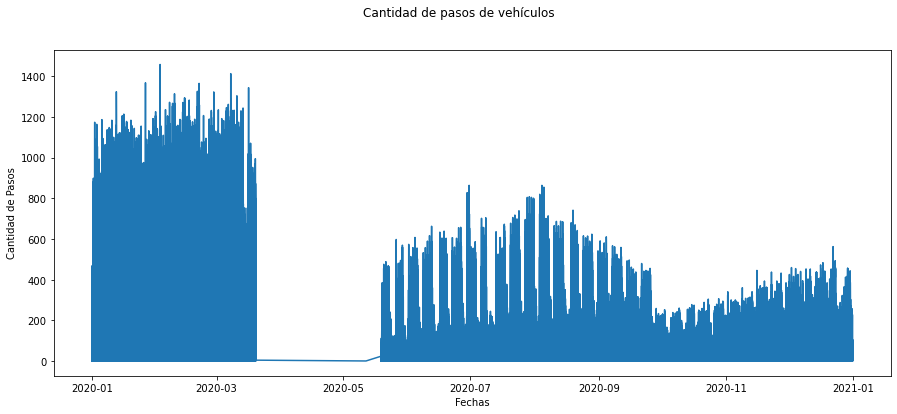

In [51]:
plt.figure(figsize = (15,6))
plt.plot(dataset_2020.fecha, dataset_2020.cantidad_pasos)
plt.xlabel('Fechas')
plt.ylabel('Cantidad de Pasos')
plt.suptitle('Cantidad de pasos de vehículos')
plt.show()

*Vemos en la gráfica una ventana de tiempo entre los meses de Marzo y Mayo del 2020, que la cantidad de pasos registrados es 0. Sin embargo, podemos apreciar que el dataset no presenta valores nulos.*  
*Lo que se está reflejando corresponde al periodo de restricción total que hubo en Argentina desde el 19-03-2020 al 19-05-2020 por la pandemia de Covid19, en esas fechas no es que tengamos registros en 0, sino que directamente no existen registros para esas fechas.*


Si nos quedamos con la variable de ‘cantidad_pasos’, vemos que presenta una alta dispersión de valores, donde hay muchos de ellos que están con valor 0, haciendo que tengamos una distribución con cola hacia la derecha.

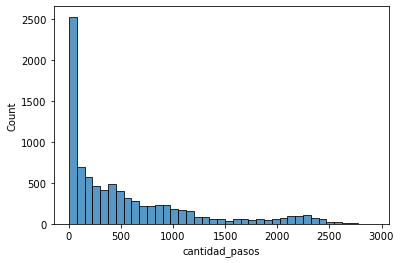

In [52]:
hora_2020 = dataset_2020.resample('H', on = 'fecha').sum()
sns.histplot(x=hora_2020.cantidad_pasos)

De todos modos, vemos como nos va en la predicción de esta año tan atípico, utilizando nuestro modelo optimizado previamente.  
Comencemos acomodando nuestra matriz de datos, utilizando 48 horas para predecir la 49.


In [53]:
senial_2020 = hora_2020.cantidad_pasos
senial_2020.shape

(8782,)

In [54]:
look_back = 48

In [55]:
N = senial_2020.shape[0]
X_2020 = np.zeros((N - look_back - 1,look_back))
y_2020 = np.zeros(N - look_back - 1)
print('Tamaño de matriz X: ', X_2020.shape)
print('Tamaño de vector Y: ', y_2020.shape)

Tamaño de matriz X:  (8733, 48)
Tamaño de vector Y:  (8733,)


In [56]:
for i in range(X_2020.shape[0]):
    X_2020[i,:] = senial_2020.iloc[i:i+look_back]
    y_2020[i] = senial_2020.iloc[i+look_back]

In [57]:
print(X_2020)

[[ 908.  663.  399. ... 1282. 1074.  788.]
 [ 663.  399.  256. ... 1074.  788.  818.]
 [ 399.  256.  227. ...  788.  818.  705.]
 ...
 [ 716.  612.  495. ...  490.  527.  466.]
 [ 612.  495.  450. ...  527.  466.  464.]
 [ 495.  450.  386. ...  466.  464.  469.]]


In [58]:
print(y_2020)

[818. 705. 575. ... 464. 469. 470.]


Realicemos la producción y veamos gráficamente su representación.

In [59]:
y_2020_pred = grid_search_rf.best_estimator_.predict(X_2020)

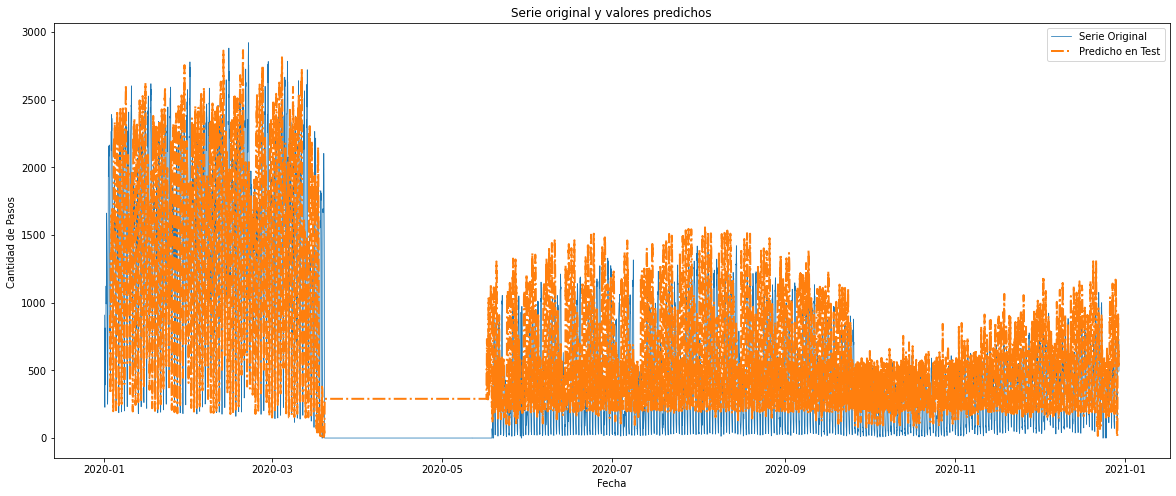

In [60]:
plt.figure(figsize=(20,8))
plt.plot(senial_2020.index[:X_2020.shape[0]], senial_2020[:X_2020.shape[0]],lw = 0.75, label = 'Serie Original')
plt.plot(senial_2020.index[look_back:X_2020.shape[0]], y_2020_pred[look_back:X_2020.shape[0]],'-.', lw = 2, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos ')
plt.title('Serie original y valores predichos')

#plt.xlim(datetime.date('2019-09-01'), datetime.date('2020-01-01'))
#plt.xlim(6600,6935)

plt.show()

*Podemos observar que los primeros meses del 2020 el modelo hace predicciones y se va ajustando bastante bien a los datos reales. Sin embargo, el modelo no consigue predecir correctamente el valor entre los meses de Marzo y Mayo, cuando sucedió la restricción de circulación, claramente en vez de predecir 0 está prediciendo un valor continuo, pero cercano a los 500.*  
*Luego de esa ventana, podemos observar que el modelo no predice correctamente ninguno de los valores mínimos de 0 (durante el entrenamiento valores tan bajos eran casos muy aislados), y para los picos máximos notamos que el modelo siempre predice valores más altos.*


Analicemos el rendimiento del modelo con la ayuda de la función definida anteriormente.

Modelo a evaluar: RandomForestRegressor(n_estimators=200, random_state=42)


Error RMSE en Train: 65.47779770282574
Error RMSE en Test: 228.43511950864394


Error R2 en Train: 0.9960630009990746
Error R2 en Test: 0.8764337781113476




/home/alex/miniconda3/envs/tseries/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/tseries/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


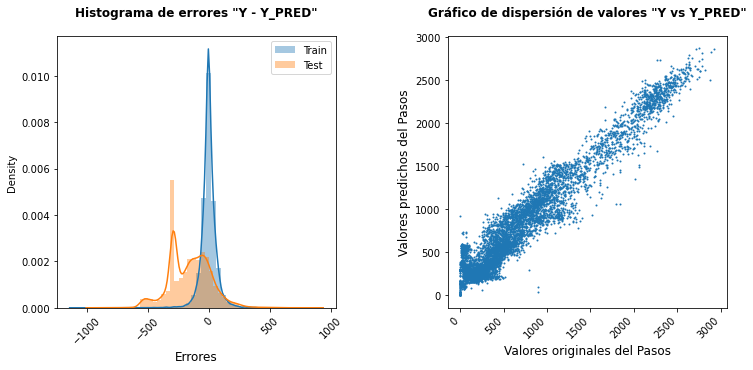

In [61]:
evaluacion_modelo(X_train, X_2020, y_train, y_2020, grid_search_rf.best_estimator_)

*Podemos observar:*  
- *el valor de RMSE en Test subio considerablemente de 154 (obtenido para el análisis del 2019) a 228.  
- *el valor obtenido en R2 cae a 87% (de un 96%), lo que nos da una idea que el modelo para predecir el 2020 no es menos performante.*  
- *en el histograma “Y - Y_PRED” en Test ya no tenemos un gráfica centrada en 0, se nota más alineada a izquierda, es decir hay más valores predecidos por encima de lo que verdaderamente son.*  
- *al mirar el gráfico “Y vs Y_PRED” notamos una mayor dispersión de la nube de puntos, y si prestamos atención al valor 0 vemos una gran acumulación de puntos predichos por encima de este valor.*


*En conclusión, nuestro modelo que hace un buen trabajo en el 2019, ya no funciona tan correctamente para el año 2020. Pero recordemos que el 2020 fue un año muy atípico para el mundo entero, por culpa de la pandemia Covid19.*

---

<br />

## Parte D: Conclusiones, investigaciones y opcionales  

<br />

---

### **Predicciones sobre 2020**

Pudimos observar que nuestro modelo no funcionó muy bien para las predicciones sobre el 2020, el cual fue un año atípico, con muchos días donde la cantidad de paso fue de 0 vehículos, y donde luego de la restricción total, el ritmo no fue el mismo al de años anteriores. Aparecen varios momentos donde la cantidad de pasos es 0, e inclusive el volumen total de movimiento es mucho menor.  
Si se desea predecir mejor el 2020 en adelante, **es conveniente reentrenar el modelo con datos más actuales, donde se pueda percibir la nueva realidad del movimiento de vehículos**.

### **Distribución en los datos**

Como podemos apreciar continuación, tanto para el dataset utilizado para entrenar el modelo, como el dataset a predecir en el 2020, ninguno de los 2 la variable ‘cantidad_pasos’ tiene una distribución normal.

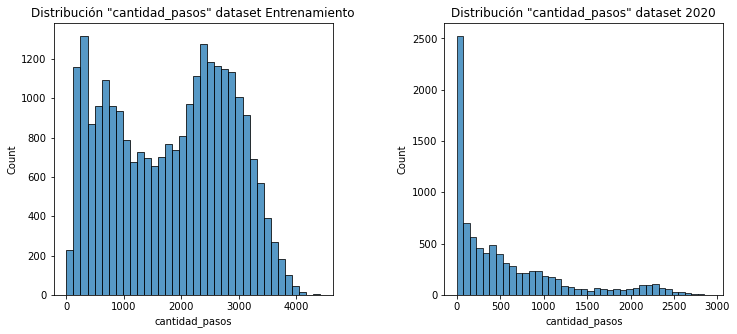

In [62]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(x=hora.cantidad_pasos)
plt.title('Distribución "cantidad_pasos" dataset Entrenamiento')
    
plt.subplot(1,2,2)
sns.histplot(x=hora_2020.cantidad_pasos)
plt.title('Distribución "cantidad_pasos" dataset 2020')
    
plt.subplots_adjust(wspace=0.4)
    
plt.show()

Para el dataset utilizado en el entrenamiento, se refleja que en las horas de la mañana y luego en las horas de la tarde-noche la cantidad de pasos aumentan. Nos encontramos con una distribución con 2 picos de valores altos.  
Para el dataset del 2020, vemos que la misma variable tiene una gran cantidad de valores bajos, lo que provoca una cola larga hacia la derecha.  
**Como mejora se podría transformar estos datos**, para ajustar un poco mejor sus distribuciones, luego entrenar, predecir y evaluar el desempeño del modelo. 


### **Pruebas de Estacionariedad (Stationarity)**

Si bien realizamos la comprobación de condiciones de Estacionariedad mediante el test de ADF, existe otra prueba muy útil, la de KPSS (Kwiatkowski-Phillips-Schmidt-Shin) que nos ayuda a evaluar las condiciones de Estacionariedad en torno a una tendencia determinista. Conceptualmente, en el test KPSS también partimos de una hipótesis inicial, pero a diferencia de ADF, en este caso consideramos inicialmente que la serie cumple con las condiciones de Estacionariedad. Además, también la prueba nos va a devolver varios valores: el de la prueba propiamente dicha, el valor “p-value”, y los valores umbrales.  
Entonces, si el valor “p-values” es lo suficientemente chico, podemos considerar como pequeño a valores menores que 0.05, entonces vamos a estar rechazando la hipótesis inicial, y por la tanto la serie no cumple con las condiciones de Estacionariedad. Es decir, el comportamiento es exactamente opuesto que el de la prueba ADF.  
Con esta prueba no solo nos indica el rechazo de la hipótesis inicial, sino que también nos indica si la serie aumenta o disminuye de manera constante.  
Analizando esto para nuestra serie resampleada por dia y hora, tenemos:


In [63]:
# KPSS Test
print('Prueba KPSS en dataset por dia:')
result = kpss(dia.cantidad_pasos, regression='ct', nlags="auto")
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

Prueba KPSS en dataset por dia:

KPSS Statistic: 0.677236
p-value: 0.010000
Critial Values:
   10%, 0.119
Critial Values:
   5%, 0.146
Critial Values:
   2.5%, 0.176
Critial Values:
   1%, 0.216


/home/alex/miniconda3/envs/tseries/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [64]:
# KPSS Test
print('Prueba KPSS en dataset por dia:')
result = kpss(hora.cantidad_pasos, regression='ct', nlags="auto")
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

Prueba KPSS en dataset por dia:

KPSS Statistic: 0.394291
p-value: 0.010000
Critial Values:
   10%, 0.119
Critial Values:
   5%, 0.146
Critial Values:
   2.5%, 0.176
Critial Values:
   1%, 0.216


/home/alex/miniconda3/envs/tseries/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Como podemos observar, en ambas series el valor “p-value” es menor a 0.05, por lo tanto podemos decir que **ambas series no cumplen con las condiciones de Estacionariedad en torno a un tendencia determinista**.  
Se podría probar diferenciar la serie, y evaluar si conseguimos una serie que cumpla estrictamente con las condiciones de Estacionariedad (esto es, cumple la prueba ADF y también KPSS). Luego se deberá realizar el modelado y las predicciones.


### **Modelado con enfoque tradicional**

Realizar una predicción utilizando un modelo ARIMA supone analizar el problema de una manera más clásica.  
Recordemos que los modelos ARIMA representan al conjunción de dos técnicas:  
* modelos Autoregresivos (AR(p)): el cual utiliza los valores pasados de la variable al momento de realizar predicciones.  
*  modelos de Media Móvil (MA(q)): utiliza los errores de predicciones pasados para modelar las predicciones futuras.  
* diferenciación (I): además, el modelo nos permite definir la diferenciación necesaria sobre la serie original, buscando que cumple con la condición de Estacionariedad.  
  
Se propone a continuación entrenar un modelo ARIMA, y analizar su comportamiento. Para eso vamos a:
- dividir nuestro dataset en dos, una parte para Train y la otra para Test.  
- vamos a generar y entrenar el modelo ARIMA. 
- mediremos el desempeño del modelo obtenido.   
- analizaremos gráficamente el modelo obtenido contra los valores de Train.
- haremos la predicción sobre Test y veremos los resultados.  


In [65]:
N_test = 2160 # Ultimo trimestre 2019
N_train = hora.cantidad_pasos.shape[0] - N_test # cantidad de instancias que vamos a usar para entrenar. 

X_train = hora.cantidad_pasos[:N_train]
y_test = hora.cantidad_pasos[N_train:]

print(X_train.shape)
print(y_test.shape)

(24120,)
(2160,)


In [66]:
model = ARIMA(X_train, order=(1,1,5))  # order=(p, d, q), para definir estos valores utilizamos como ayuda las gráficas ACF > q, y PACF > p
results_ARIMA = model.fit()

/home/alex/miniconda3/envs/tseries/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/alex/miniconda3/envs/tseries/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [67]:
print('Error en Train:')
print('\n') 

RMSE = np.sqrt(mean_squared_error(X_train, results_ARIMA.fittedvalues))
print('RMSE Error:', RMSE)

R2 = r2_score(X_train, results_ARIMA.fittedvalues)
print('R2 Error:',R2)

Error en Train:


RMSE Error: 329.4442097899925
R2 Error: 0.9002969270984688


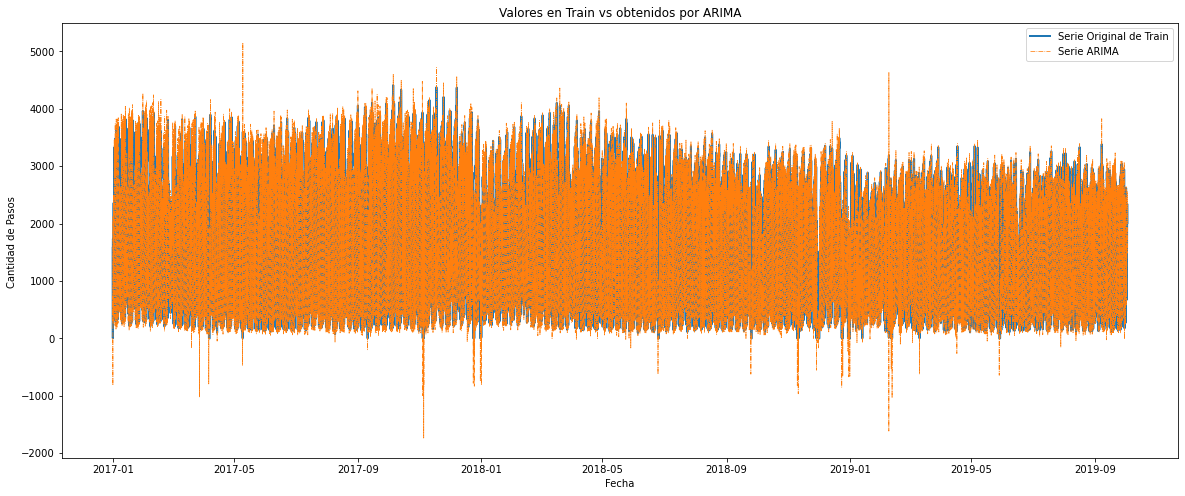

In [68]:
plt.figure(figsize=(20,8))

plt.plot(X_train, lw = 2, label = 'Serie Original de Train')
plt.plot(results_ARIMA.fittedvalues, '-.', lw = 0.75, label = 'Serie ARIMA')

plt.title('Valores en Train vs obtenidos por ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos ')
plt.legend()
plt.show()

In [69]:
# Prediccion
fc = results_ARIMA.forecast(len(y_test), alpha=0.05, dynamic=True)  # 95% conf

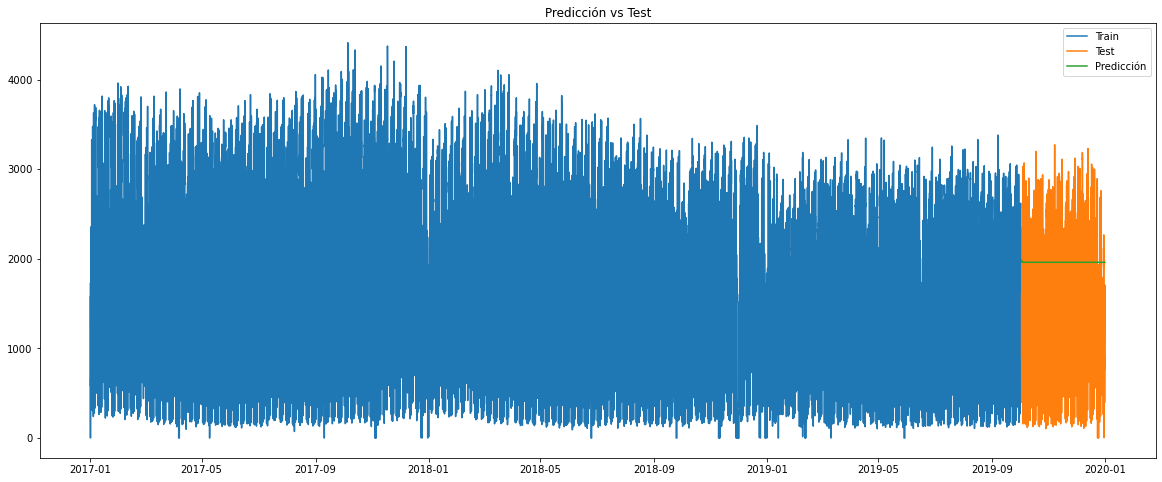

In [70]:
plt.figure(figsize=(20,8))
plt.plot(X_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fc, label='Predicción')

plt.title('Predicción vs Test')
plt.legend()
plt.show()


Si bien el modelo obtenido y comparado contra Train tiene un desempeño aceptable, observamos que **no realiza un buen trabajo al momento de predecir valores futuros** (predice prácticamente un valor constante).  
Como pudimos observar en análisis anteriores, sabemos que nuestra serie resampleada por hora tiene **componentes estacionales** (el comportamiento en la hora actual es muy parecido al de 24h antes). **Esta información el modelo la desconoce por completo**.  
Para modelar con ARIMA, existe el hiperparámetro “seasonal_order=(P, D, Q, s)” que nos ayuda a definir estas componentes estacionales en el modelo. Si bien se realizaron algunas pruebas ajustando este hiperparámetro, el modelo no terminó de converger.  
**Para mejorar el desempeño del modelo ARIMA analizado, se debe seguir profundizar sobre estos conceptos, y realizar algunas pruebas extra**.
